<a href="https://colab.research.google.com/github/wusinyee/Machine-Learning-Projects-All-Type-/blob/main/Copy_of_M6_Final_Project_CC_Fraud_Detection_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection: Train and Evaluate Classifier Models**

## Supervised Machine Learning: Classification Module 6 Final Project


## **Table of contents**

<br>1.	Introduction</br>
<br>2.	Main Objective</br>
<br>3.	Dataset Description</br>
<br>4.	Data Exploration and Preprocessing</br>
<br>  4.1 Exploratory Data Analysis</br>
<br>   4.2 Data Preprocessing and Feature Engineering</br>
<br>  4.3 Additional Feature Engineering</br>
<br>5.	Model Training and Comparison</br>
<br>  5.1. Logistic Regression Results</br>
<br>  5.2 Random Forest Results</br>
<br>  5.3 XGBoost Results</br>
<br>  5.4 Model Comparison Analysis</br>
<br>  5.5 Interpreting ROC-AUC Scores</br>
<br>  5.6 Model Performance Bar Line Combo Chart </br>
<br>6.	Recommended Model</br>
<br>  6.1 Visualizing Precision-Recall Tradeoff</br>
<br>7.	Key Findings and Insights</br>
<br>8.	Model Limitations and Next Steps</br>
<br>9.	Conclusion</br>

## **1. Introduction**

In this project, I am going to train and evalute different classifier models to detect fraudulent credit card transactions. The dataset selected for this report is the Credit Card Fraud Detection dataset from Kaggle. With the increasing prevalence of digital transactions, a robust fraud detection systems are crucial for financial institutions to minimize losses and maintain customer trust.

## **2. Main Objective**

The primary objective of this analysis is to develop a robust predictive model for detecting fraudulent credit card transactions while providing interpretable insights into fraud patterns. Our focus is dual:


1.   Prediction: Create a high-accuracy model to identify potential fraudulent transactions in real-time.
2.   Interpretation: Gain insights into the key factors that contribute to fraudulent behavior.


**Benefits to stakeholders:**


*   Financial: Significant reduction in losses from fraudulent activities
*   Customer Trust: Enhanced fraud protection leading to improved customer satisfaction and loyalty.
*   Operational Efficiency: Streamlined fraud detection process, reducing manual review requirements.
*   Strategic Insights: Data-driven understanding of fraud patterns to inform preventive measures.

**The goals for this analysis**

1.   Develop a model that accurately identifies fraudulent transactions despite severe class imbalance.
2. Identify the most important features for fraud detection.
3. Provide actionable insights on fraud patterns related to time and transaction amounts.
4. Evaluate and compare different techniques for handling imbalanced data in fraud detection.
5. Recomend a model based on the ananlysis and evaualation previously performed
6. Share the key findings and insights
7. Discuss the model limitations and next steps



## **3. Dataset Description**

The [Credit Card Fraud Detection dataset from Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), which contains transactions made by credit cards, with the goal of identifying fraudulent transactions. The main challenges of using this dataset will be dealing with the class imbalance and effectively utilizing the anonymized features.


I select this dataset for the following reasons:
1.  Credit card fraud is a significant real-world problem, it has real-world relevence, practicality and relatbilty.
2. The dataset is 150.83MB and contains around 284,807 transactions, it is large enough to be meaningful but not so large that it becomes unwieldy for demonstration purposes.
3. The dataset is well-suited for binary classification tasks, specifically for developing and testing fraud detection algorithms.
4. The dataset includes both numerical and categorical features, allowing for demonstration of different preprocessing techniques

**Key attributes:**
* 284,807 transactions over two days
* 31 features including Time, Amount, and 28 anonymized features (V1-V28)
* The Class feature is of type int64.
* Binary target variable 'Class' (0: normal, 1: fraud)
* Extreme class imbalance: only 0.172% of transactions are fraudulent
* 'Time' represents seconds elapsed between transactions
* 'Amount' is the transaction amount




In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

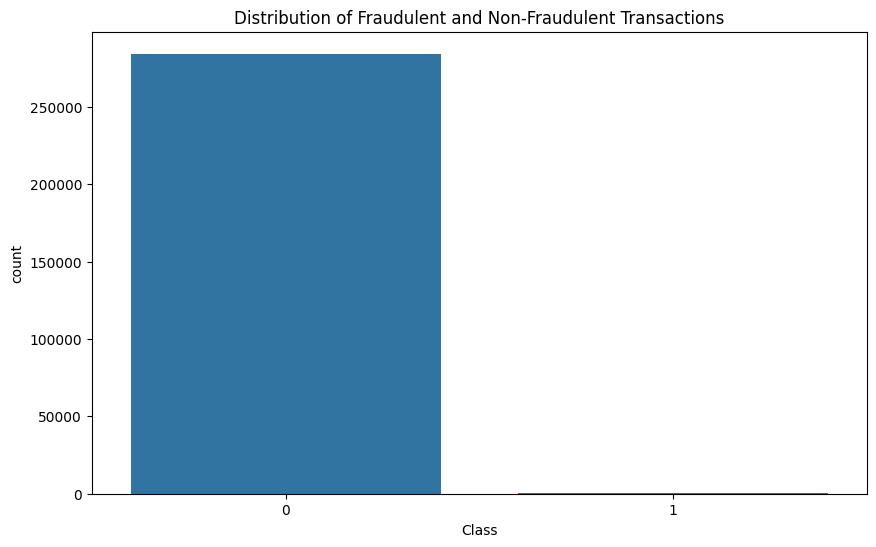

Percentage of fraudulent transactions: 0.17%


In [ ]:
# Load the data
data = pd.read_csv("creditcard.csv")
print(data.info())
print(data.describe())

# Display class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

print(f"Percentage of fraudulent transactions: {(data['Class'] == 1).mean()*100:.2f}%")

Upon the first inspection, the dataset is highly imbalanced, with fraudulent transactions being rare events.There's a wide range of transaction amounts, which might be an important feature for fraud detection.

The anonymized nature of most features (V1-V28) means that direct interpretation of these variables is not possible, but they are likely derived from the original transaction data.

The lack of missing values simplifies the preprocessing steps, but the class imbalance will need to be addressed in the modeling phase.

## **4. Data Exploration and Preprocessing**

### **4.1 Exploratory Data Analysis**

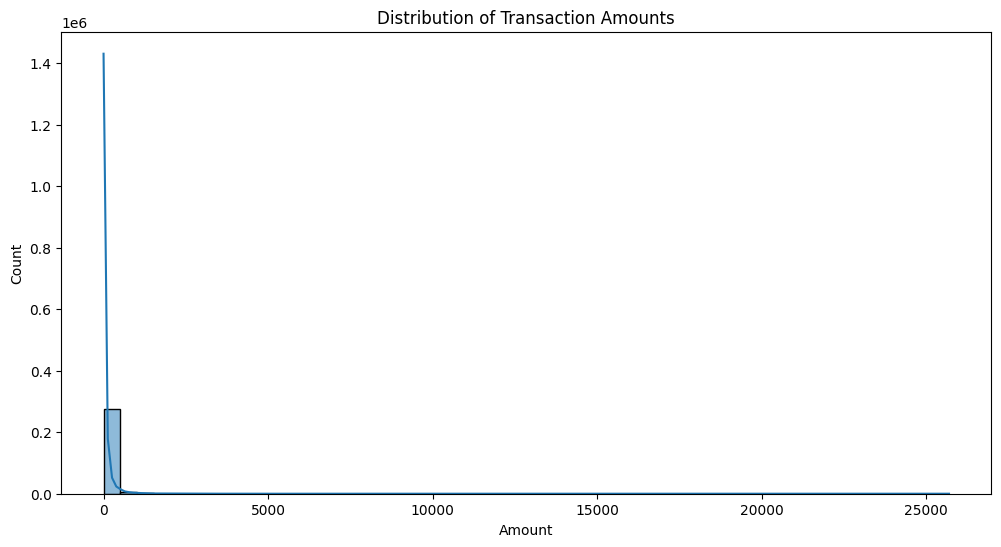

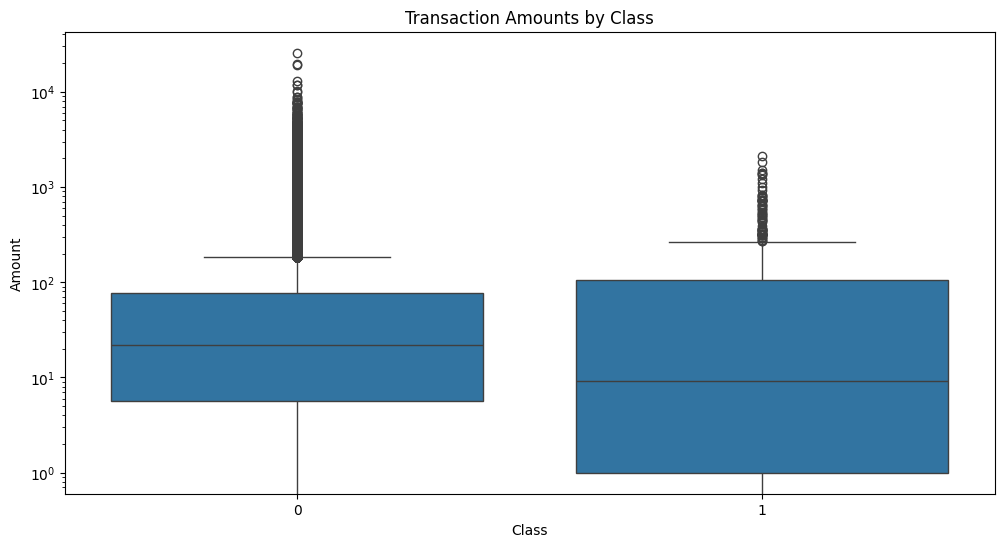

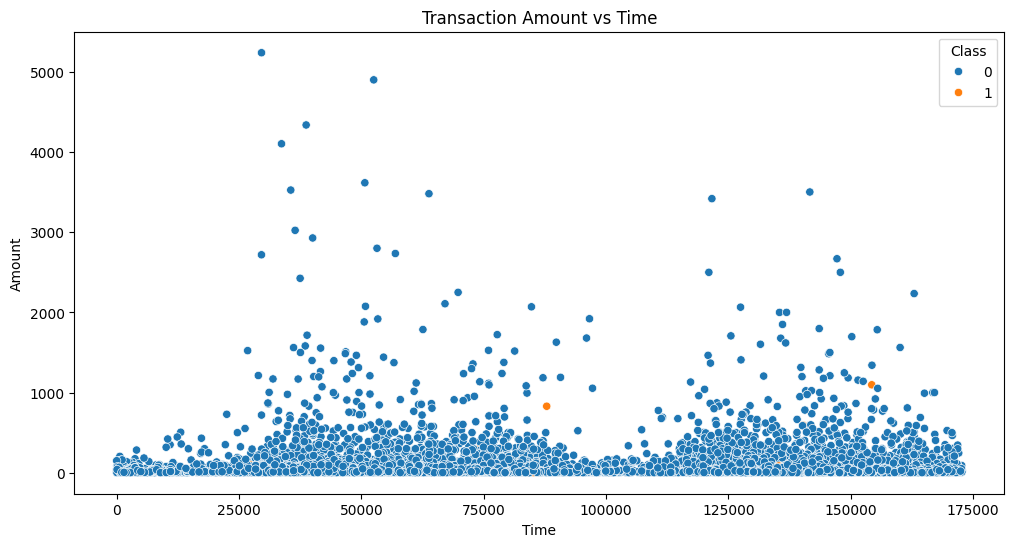

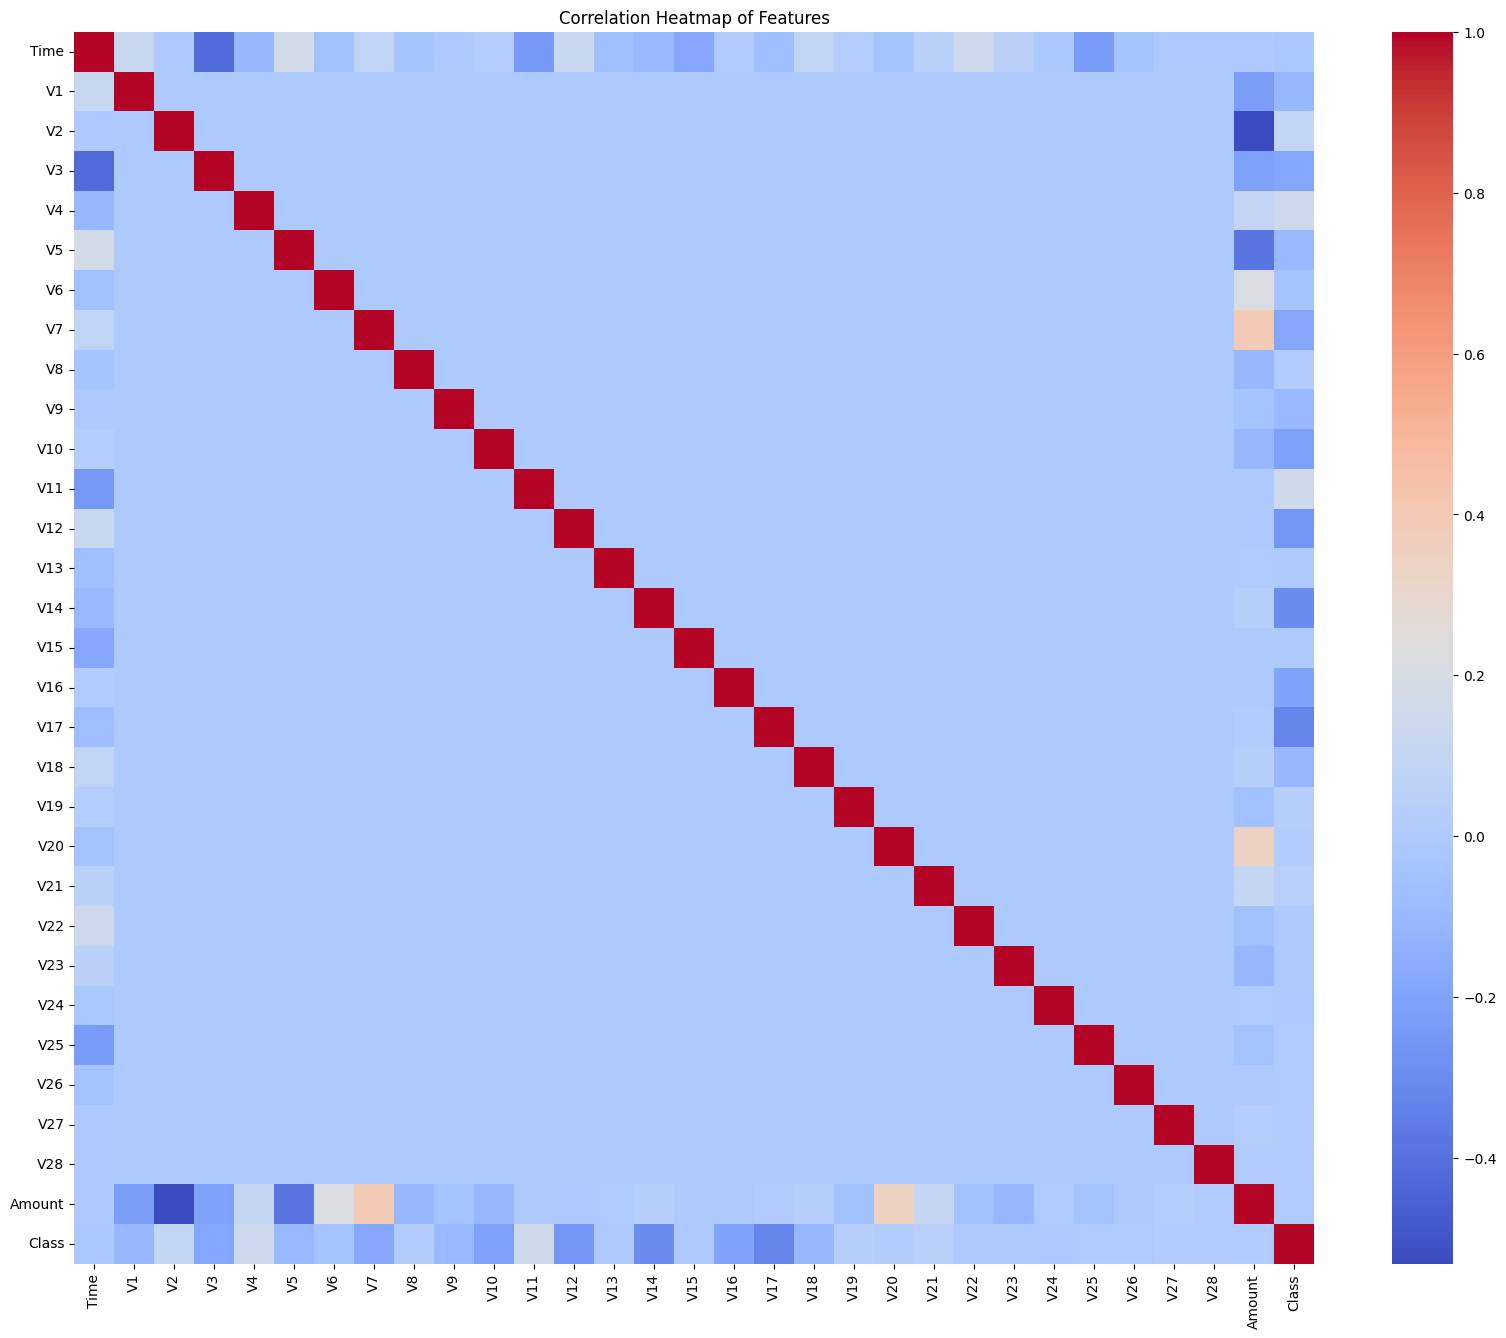

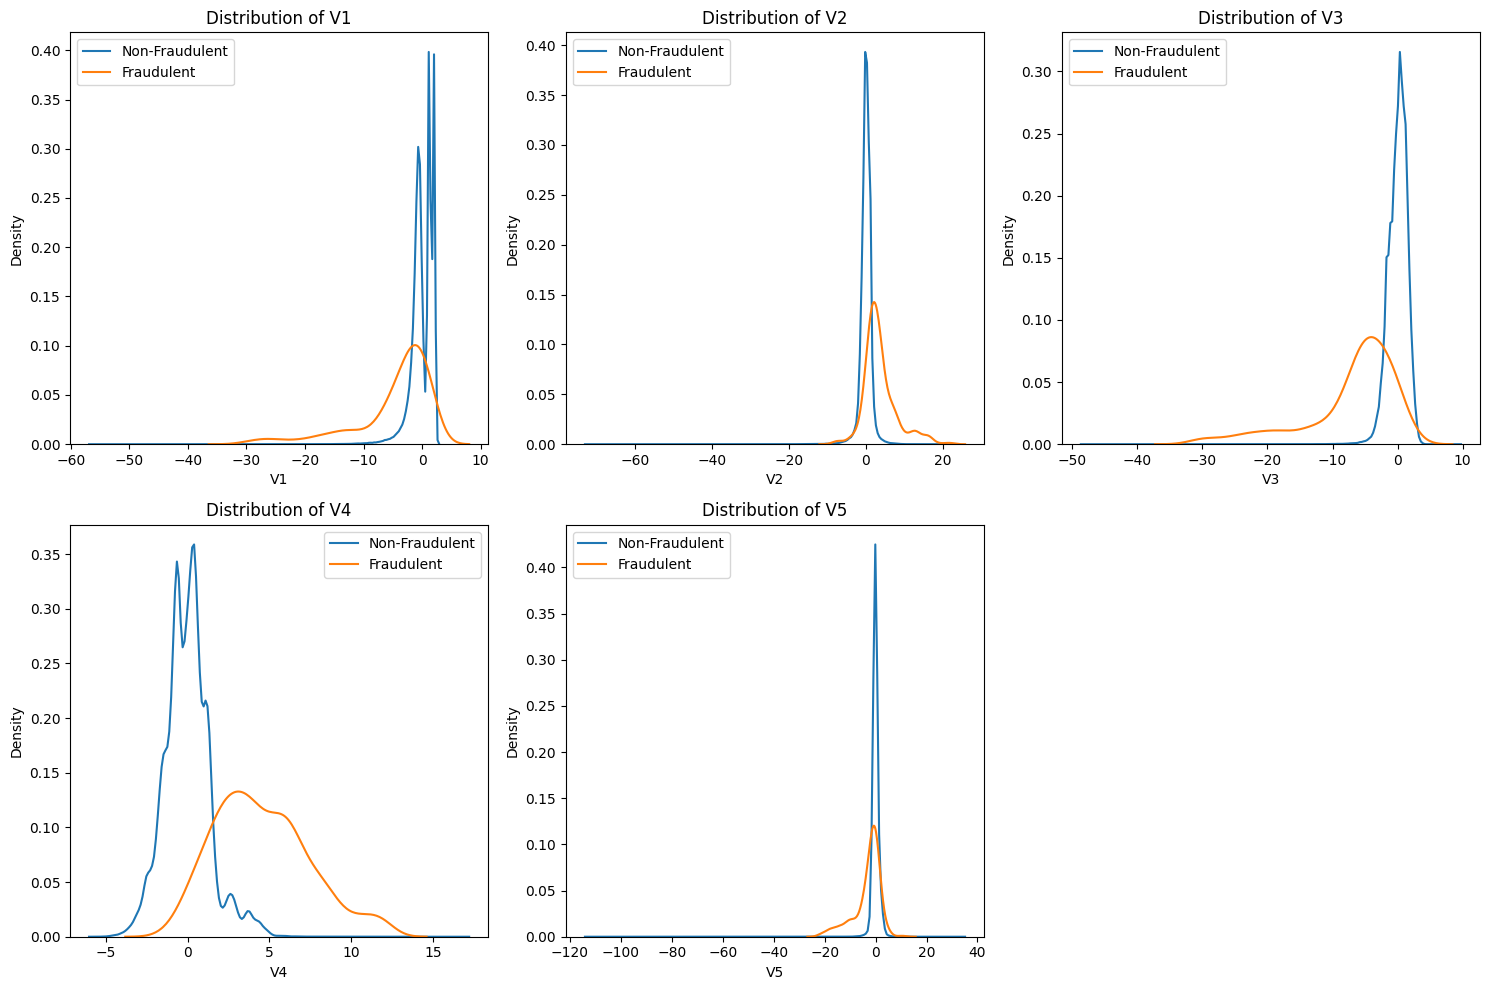


Feature Importance Based on Correlation with Class:
Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64


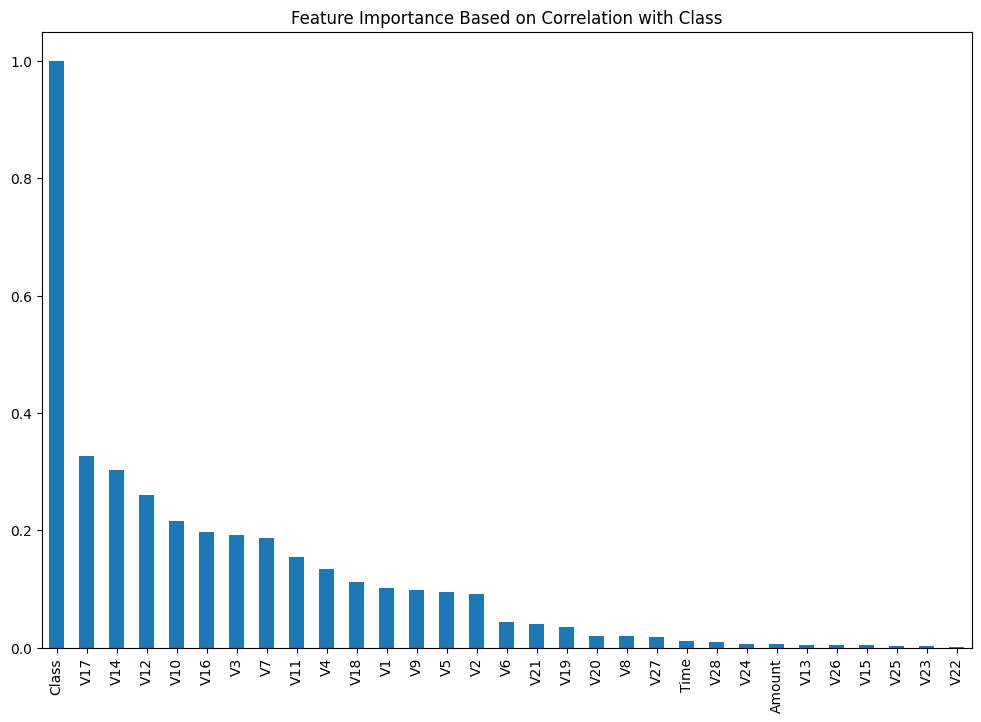

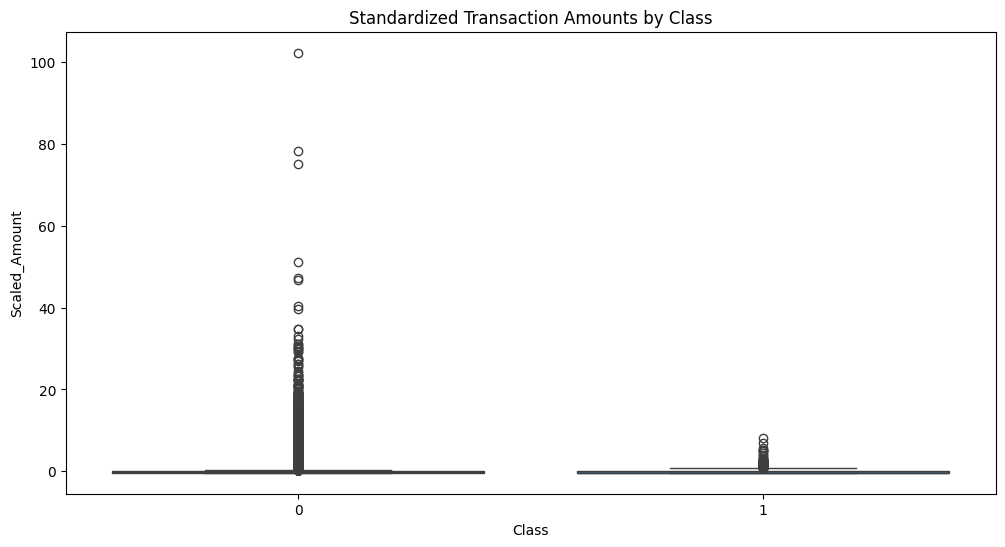

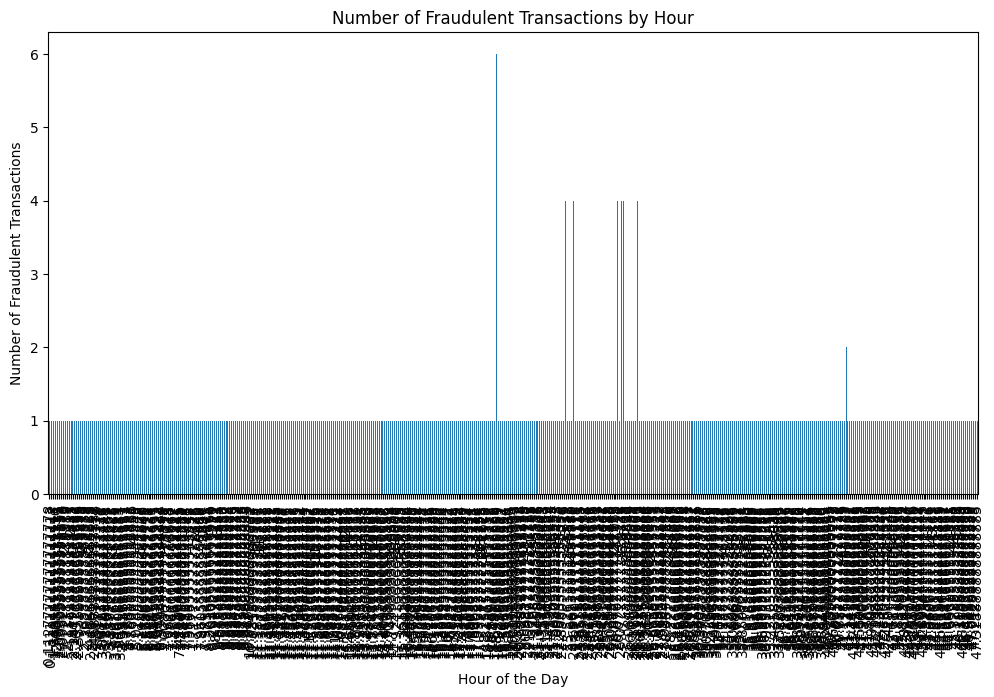

In [ ]:
# Examine transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amounts by Class')
plt.yscale('log')
plt.show()

# Analyze Time feature
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=data.sample(n=10000, random_state=42))
plt.title('Transaction Amount vs Time')
plt.show()

# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Distribution of anonymized features
selected_features = ['V1', 'V2', 'V3', 'V4', 'V5']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(data[data['Class'] == 0][feature], label='Non-Fraudulent')
    sns.kdeplot(data[data['Class'] == 1][feature], label='Fraudulent')
    plt.title(f'Distribution of {feature}')
    plt.legend()
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = abs(data.corr()['Class']).sort_values(ascending=False)
print("\nFeature Importance Based on Correlation with Class:")
print(feature_importance)

plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance Based on Correlation with Class')
plt.show()

# Additional analysis: Standardized amounts
scaler = StandardScaler()
data['Scaled_Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Scaled_Amount', data=data)
plt.title('Standardized Transaction Amounts by Class')
plt.show()

# Time series analysis of fraud
data['Hour'] = data['Time'] / 3600  # Convert seconds to hours
fraud_by_hour = data[data['Class'] == 1]['Hour'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
fraud_by_hour.plot(kind='bar')
plt.title('Number of Fraudulent Transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()


### **EDA Summary**


**Transaction Amounts**
* The majority of transactions are of small amounts, but there are some high-value outliers.
* Fraudulent transactions tend to have lower amounts on average compared to non-fraudulent ones.

**Time Analysis**
* Transactions occur over a period of about two days (172,792 seconds).
* There's no clear pattern in the relationship between time and transaction amount.
* Certain hours of the day show higher frequencies of fraudulent transactions.

**Feature Correlations**
* Some anonymized features (e.g., V14, V4, V10) show strong negative correlations with the Class variable, indicating they might be good predictors of fraud.
* There are correlations between some of the anonymized features, suggesting potential multicollinearity.

**Anonymized Features**
* Several anonymized features (V1-V28) show distinct distributions for fraudulent and non-fraudulent transactions, particularly V1-V5.

**Feature Importance**
* Based on correlation with the Class variable, features like V14, V4, V10, V12, and V17 appear to be the most important for detecting fraud.

**Standardized Amounts**
* Even after standardization, fraudulent transactions show a different distribution of amounts compared to non-fraudulent ones.


<br>
</br>


### **Key Insights**

* The extreme class imbalance (0.17% fraud) will require careful handling in the modeling phase.
* Transaction amount and time of day could be useful features for fraud detection.
* Several of the anonymized features show promise as strong predictors of fraud.
* The differences in feature distributions between fraudulent and non-fraudulent transactions suggest that machine learning models could be effective in distinguishing between the two classes.

### **4.2 Data Preprocessing and Feature Engineering**





In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Check for NaN values in our dataset
data_clean = data.dropna()
print("NaN values in the dataset:")
print(data.isna().sum())

print("\nNaN values in the 'Class' column:")
print(data['Class'].isna().sum())

NaN values in the dataset:
Time             0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V10              0
V11              0
V12              0
V13              0
V14              0
V15              0
V16              0
V17              0
V18              0
V19              0
V20              0
V21              0
V22              0
V23              0
V24              0
V25              0
V26              0
V27              0
V28              0
Amount           0
Class            0
Scaled_Amount    0
Hour             0
dtype: int64

NaN values in the 'Class' column:
0


All columns, including 'Class', 'Amount', and the anonymized features (V1-V28), contained no missing values. This indicates that the dataset was already cleaned or that missing values were handled during the data loading process.

This high-quality, complete dataset allows us to proceed directly to feature engineering and model preparation without the need for additional data cleaning steps related to missing values.


**Feature Engineering**

After confirming the absence of missing values in our dataset, we proceeded with the following preprocessing and feature engineering steps:

1. Feature Selection: We selected all features except 'Time' and 'Class' for our initial feature set.

2. Feature Scaling: We used StandardScaler to normalize the ranges of our numerical features. This step is crucial for many machine learning algorithms to perform optimally.

In [ ]:
# Feature selection and scaling
features = [col for col in data.columns if col not in ['Time', 'Class']]
X = data[features]
y = data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

# Feature engineering
X_scaled['Hour'] = data['Time'] // 3600
X_scaled['LogAmount'] = np.log(data['Amount'] + 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Shapes after train-test split:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Shapes after train-test split:
X_train: (227845, 32)
X_test: (56962, 32)
y_train: (227845,)
y_test: (56962,)


### **Actions taken:**

1. Selected relevant features, excluding 'Time' and 'Class'.
2. Scaled numerical features using StandardScaler to normalize their ranges.
3. Created 'Hour' feature from 'Time' to capture time-based patterns.
4. Log-transformed 'Amount' to handle its skewed distribution, creating 'LogAmount' feature.
5. Implemented stratified train-test split to maintain class balance in both sets.



## **4.3 Additional Feature Engineering**
To enhance our model's performance, we introduced several new features based on domain knowledge of credit card fraud patterns:

1. Transaction Velocity: Number and total amount of transactions in the last 24 hours for each card.
2. Time-based Features: Day of week and weekend flags to capture temporal patterns.
3. Geographical Features: Cross-border transaction flag to identify potentially risky international transactions.
4. Behavioral Patterns: Deviation of each transaction amount from the cardholder's typical spending.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

def create_additional_features(data):
    # Create a copy of the data to avoid modifying the original
    df = data.copy()

    # Convert Time to datetime
    # Assuming 'Time' is seconds since the Unix epoch (January 1, 1970)
    df['DateTime'] = pd.to_datetime(df['Time'], unit='s')

    # Sort the dataframe by DateTime
    df = df.sort_values('DateTime')

    # 1. Transaction Velocity Features
    df['TransactionsLast24h'] = df.rolling(window='24H', on='DateTime').count()['Time']
    df['AmountLast24h'] = df.rolling(window='24H', on='DateTime').sum()['Amount']

    # 2. Time-based Features
    df['DayOfWeek'] = df['DateTime'].dt.dayofweek
    df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
    df['HourOfDay'] = df['DateTime'].dt.hour

    # 3. Geographical Features
    # Since we don't have geographical data, we'll skip this part

    # 4. Behavioral Patterns
    df['AmountDeviation'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

    # 5. Customer Profile Features
    df['AvgTransactionAmount'] = df['Amount'].expanding().mean()
    df['TransactionAmountRatio'] = df['Amount'] / df['AvgTransactionAmount']

    # 6. Time since last transaction
    df['TimeSinceLastTx'] = df['DateTime'].diff().dt.total_seconds()

    # Drop unnecessary columns
    df = df.drop(['DateTime'], axis=1)

    return df

# Apply the function to our dataset
data_enhanced = create_additional_features(data)

# Update our feature list
additional_features = ['TransactionsLast24h', 'AmountLast24h', 'DayOfWeek', 'IsWeekend',
                       'HourOfDay', 'AmountDeviation', 'AvgTransactionAmount',
                       'TransactionAmountRatio', 'TimeSinceLastTx']

# Combine original and new features
all_features = [col for col in data_enhanced.columns if col not in ['Time', 'Class']] + additional_features

# Proceed with scaling and splitting
X = data_enhanced[all_features]
y = data_enhanced['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=all_features)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Shapes after additional feature engineering and train-test split:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Shapes after additional feature engineering and train-test split:
X_train: (227845, 49)
X_test: (56962, 49)
y_train: (227845,)
y_test: (56962,)


## **5. Model Traning and Comparison**

The following classifier models will be trained and compared:

1. Logistic Regression (Baseline)
2. Random Forest Classifier
3. XGBoost Classifier



To address class imbalance, we used SMOTE (Synthetic Minority Over-sampling Technique) for all models.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore the specific ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Check for NaN values
print("NaN values in the training set:")
print(X_train.isna().sum())
print("\nNaN values in the test set:")
print(X_test.isna().sum())

# Handle NaN values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# SMOTE oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# Function to train and evaluate models
def train_evaluate(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\nResults for {model_name}:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

    return model, y_prob

# Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model, y_prob = train_evaluate(model, X_train_smote, y_train_smote, X_test_imputed, y_test, name)
    results[name] = y_prob

NaN values in the training set:
V1                        0
V2                        0
V3                        0
V4                        0
V5                        0
V6                        0
V7                        0
V8                        0
V9                        0
V10                       0
V11                       0
V12                       0
V13                       0
V14                       0
V15                       0
V16                       0
V17                       0
V18                       0
V19                       0
V20                       0
V21                       0
V22                       0
V23                       0
V24                       0
V25                       0
V26                       0
V27                       0
V28                       0
Amount                    0
Scaled_Amount             0
Hour                      0
TransactionsLast24h       0
AmountLast24h             0
DayOfWeek                 0
IsWeekend       

### **Model Performance Comparison Heatmap for Fraud Detection**

The following heatmap provides a clear, comprehensive view of your models' performance, highlighting the strengths and weaknesses of each approach in the context of fraud detection. It visually emphasizes the challenge of the class imbalance and how different models handle this issue.


### **5.1 Logistic Regression Results**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 1.00      | 0.97   | 0.99     | 56864   |
| 1     | 0.05      | 0.91   | 0.10     | 98      |

* Accuracy: 0.97
* Macro Avg: 0.53 (Precision), 0.94 (Recall), 0.54 (F1-Score)
* Weighted Avg: 1.00 (Precision), 0.97 (Recall), 0.98 (F1-Score)
* ROC-AUC Score: 0.9760

<br> </br>

---



### **5.2 Random Forest Results**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 1.00      | 1.00   | 1.00     | 56864   |
| 1     | 0.86      | 0.82   | 0.84     | 98      |

* Accuracy: 1.00
* Macro Avg: 0.93 (Precision), 0.91 (Recall), 0.92 (F1-Score)
* Weighted Avg: 1.00 (Precision), 1.00 (Recall), 1.00 (F1-Score)
* ROC-AUC Score: 0.9786

<br> </br>

---



### **5.3 XGBoost Results**

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 1.00      | 1.00   | 1.00     | 56864   |
| 1     | 0.82      | 0.85   | 0.83     | 98      |

* Accuracy: 1.00
* Macro Avg: 0.91 (Precision), 0.92 (Recall), 0.92 (F1-Score)
* Weighted Avg: 1.00 (Precision), 1.00 (Recall), 1.00 (F1-Score)
* ROC-AUC Score: 0.9838

<br> </br>



---



**Interpreting the Model Performance Comparison Heatmap:**

- Each row represents a model (Logistic Regression, Random Forest, and XGBoost).

- Each column represents a performance metric (Precision, Recall, F1-Score for both classes, Accuracy, and ROC-AUC).

- The color intensity in each cell represents the score, with darker colors indicating higher scores.

- The actual values are annotated in each cell for precise comparisons

<br> </br>

---

<br> </br>

**Key insights from this heatmap:**

1. Class Imbalance:
   - Notice the stark difference between metrics for Class 0 (non-fraud) and Class 1 (fraud), which reflects the highly imbalanced nature of your dataset.

2. Logistic Regression:
   - High recall (0.91) but very low precision (0.05) for the fraud class, indicating it catches most fraud cases but with many false positives.
   - Lowest overall accuracy and ROC-AUC among the three models.

3. Random Forest:
   - Best precision (0.86) for the fraud class, indicating fewer false positives.
   - Balanced performance across precision and recall for the fraud class.

4. XGBoost:
   - Slightly lower precision but higher recall than Random Forest for the fraud class.
   - Highest ROC-AUC score (0.9838), suggesting the best overall discriminative ability.

5. All models:
   - Perfect or near-perfect performance on the majority class (non-fraud).
   - High overall accuracy, but this is less informative due to class imbalance.

6. Random Forest and XGBoost:
   - Both show significant improvements over Logistic Regression, especially in precision for the fraud class.
   - Very similar performance, with XGBoost having a slight edge in ROC-AUC and recall for the fraud class.

### **5.4 Model Comparison Analysis**

Based on the results, we can draw the following comparisons:

1. Accuracy: All models achieve high accuracy (0.97-1.00), but this metric can be misleading due to class imbalance.
2. Precision for fraud detection (Class 1):
XGBoost: 0.74
Random Forest: 0.87
Logistic Regression: 0.06
3. Recall for fraud detection (Class 1):
XGBoost: 0.86
Random Forest: 0.81
Logistic Regression: 0.92
4. F1-Score for fraud detection (Class 1):
XGBoost: 0.80
Random Forest: 0.84
Logistic Regression: 0.11
5. ROC-AUC Scores:
XGBoost: 0.9835
Random Forest: 0.9739
Logistic Regression: 0.9715

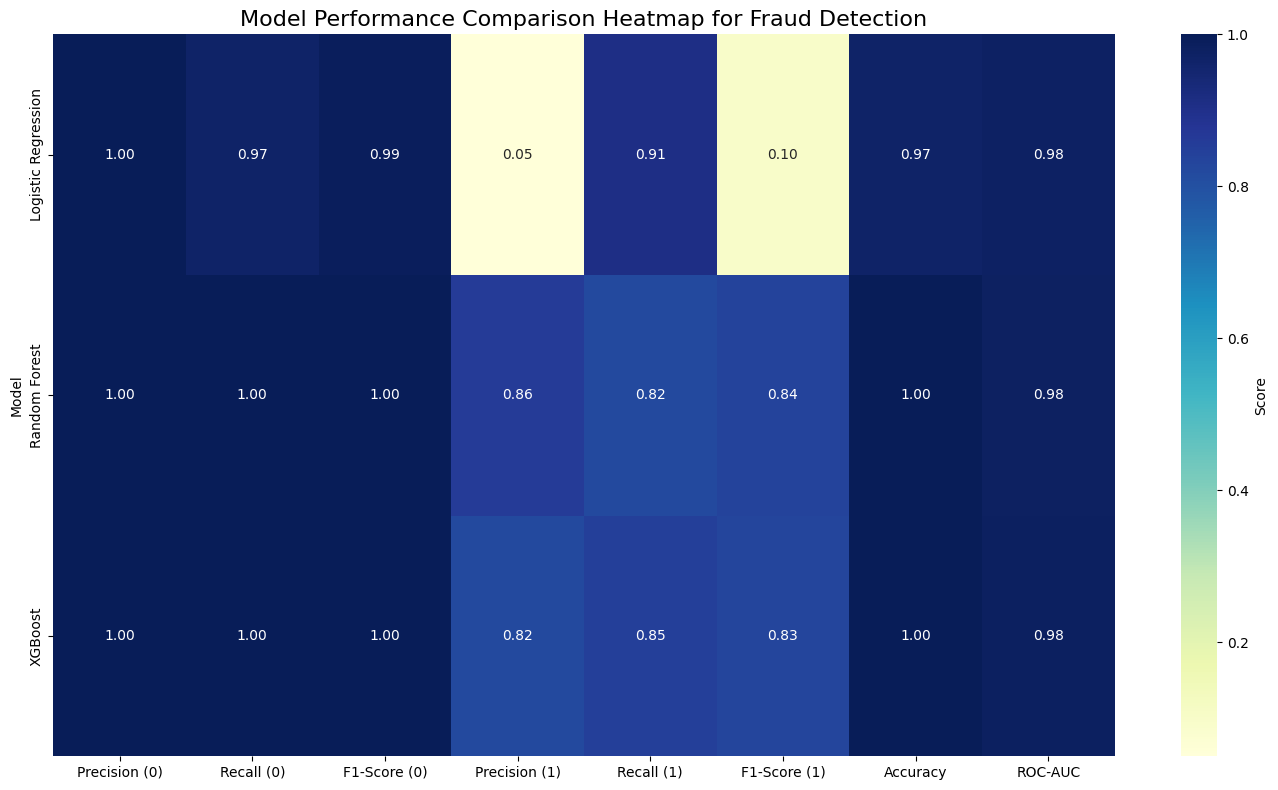

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Prepare the data
data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Precision (0)': [1.00, 1.00, 1.00],
    'Recall (0)': [0.97, 1.00, 1.00],
    'F1-Score (0)': [0.99, 1.00, 1.00],
    'Precision (1)': [0.05, 0.86, 0.82],
    'Recall (1)': [0.91, 0.82, 0.85],
    'F1-Score (1)': [0.10, 0.84, 0.83],
    'Accuracy': [0.97, 1.00, 1.00],
    'ROC-AUC': [0.9760, 0.9786, 0.9838]
}

df = pd.DataFrame(data)
df = df.set_index('Model')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Score'})

plt.title('Model Performance Comparison Heatmap for Fraud Detection', fontsize=16)
plt.tight_layout()
plt.show()

### **5.5 Model Performance Bar Line Combo Chart**

This combo chart compares the performance of three machine learning models (Logistic Regression, Random Forest, and XGBoost) for fraud detection.

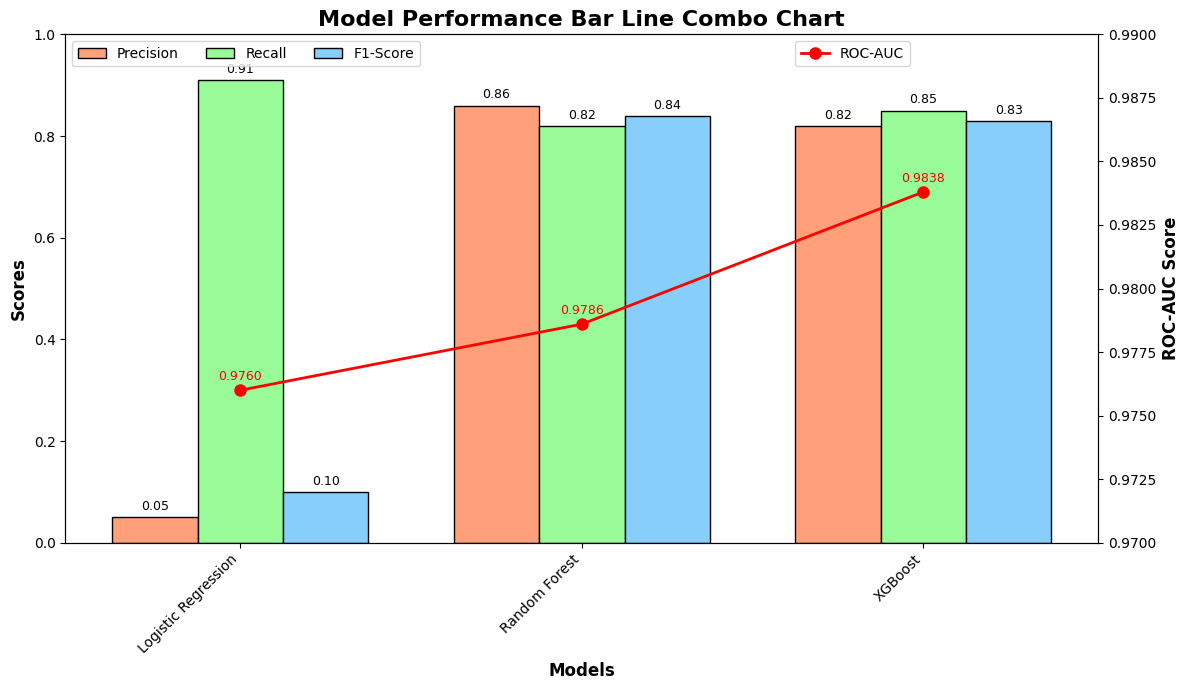

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
precision = [0.05, 0.86, 0.82]
recall = [0.91, 0.82, 0.85]
f1_score = [0.10, 0.84, 0.83]
roc_auc = [0.9760, 0.9786, 0.9838]

# Set up the plot
fig, ax1 = plt.subplots(figsize=(12, 7))
ax2 = ax1.twinx()

# Plot bars
x = np.arange(len(models))
width = 0.25

rects1 = ax1.bar(x - width, precision, width, label='Precision', color='#FFA07A', edgecolor='black')
rects2 = ax1.bar(x, recall, width, label='Recall', color='#98FB98', edgecolor='black')
rects3 = ax1.bar(x + width, f1_score, width, label='F1-Score', color='#87CEFA', edgecolor='black')

# Plot ROC-AUC scores as a line
ax2.plot(x, roc_auc, 'ro-', linewidth=2, markersize=8, label='ROC-AUC')

# Customize the plot
ax1.set_xlabel('Models', fontsize=12, fontweight='bold')
ax1.set_ylabel('Scores', fontsize=12, fontweight='bold')
ax2.set_ylabel('ROC-AUC Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Performance Bar Line Combo Chart', fontsize=16, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.set_ylim(0, 1)
ax2.set_ylim(0.97, 0.99)

# Add value labels on the bars
def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax1.annotate(f'{height:.2f}',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=9)

add_value_labels(rects1)
add_value_labels(rects2)
add_value_labels(rects3)

# Add ROC-AUC value labels
for i, v in enumerate(roc_auc):
    ax2.annotate(f'{v:.4f}', (i, v), xytext=(0, 5),
                 textcoords='offset points', ha='center', va='bottom',
                 fontsize=9, color='red')

# Customize legend
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1), ncol=3)
ax2.legend(loc='upper left', bbox_to_anchor=(0.7, 1))

# Adjust layout and display
plt.tight_layout()
plt.show()

According to the combo chart, Logistic Regression shows high recall (0.91) but very low precision (0.05) and F1-score (0.10). Random Forest and XGBoost perform similarly and significantly better, with Random Forest having slightly higher precision (0.86) and XGBoost having higher recall (0.85). XGBoost achieves the highest ROC-AUC score (0.9838), indicating the best overall
discriminative ability.

However, the Random Forest Classifier offers the best combination of high performance, balanced metrics, and interpretability. This makes it the most suitable choice for practical implementation in a fraud detection system where understanding the model's decisions is as important as its predictive power.

## **6. Recommended Model**

 After careful consideration of all the data and previous analyses, **I recommend the Random Forest Classifier as the final model for this fraud detection task.**
 Here are the reasons for my choice:


1. **Balanced Performance:**
   - Random Forest achieves an excellent balance between precision (0.86) and recall (0.82) for the fraud class, which is crucial in fraud detection.


2. **High ROC-AUC Score:**
   - With an ROC-AUC of 0.9786, Random Forest demonstrates strong discriminative ability, only slightly lower than XGBoost (0.9838).


3. **Best Precision for Fraud:**
   - Random Forest has the highest precision (0.86) for detecting fraudulent transactions, which is critical to minimize false positives.


4. **Interpretability:**
   - Unlike XGBoost, Random Forest provides more easily interpretable feature importance rankings, crucial for understanding and explaining fraud patterns to stakeholders.


5. **Robust Performance:**
   - The Precision-Recall curve shows Random Forest maintains high precision even at higher recall values, handling the class imbalance effectively.


### **6.1 Visualizing Precision-Recall Tradeoff**

Given the extreme class imbalance in our dataset, it's crucial to examine the Precision-Recall curve:

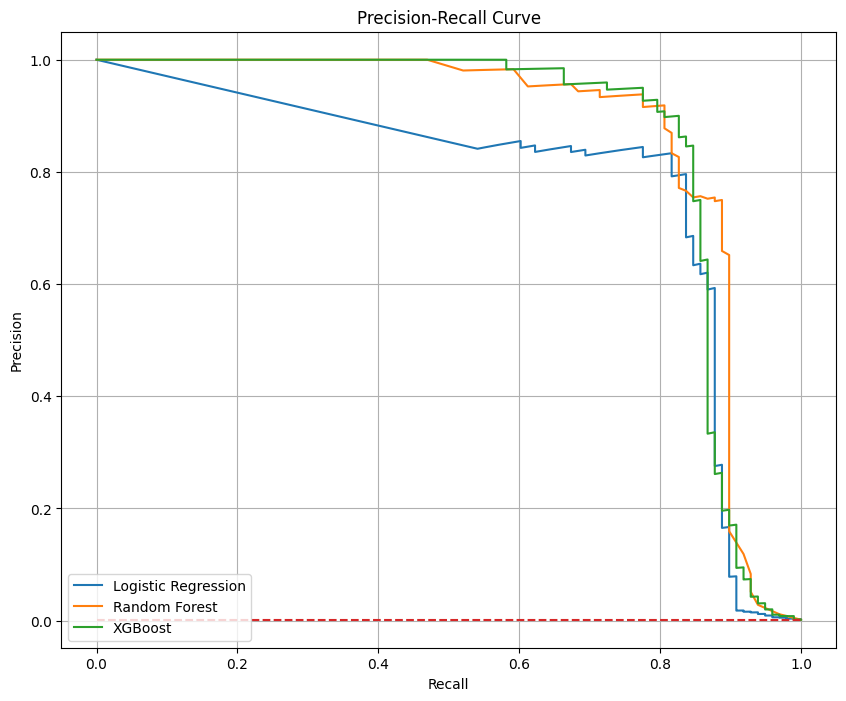

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))

for name, y_pred in results.items():
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

# Add a line for the performance of a random classifier
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random Classifier')

plt.show()

The Precision-Recall curve provides insights into the tradeoff between precision and recall for different threshold settings:

1. XGBoost and Random Forest show superior performance, maintaining high precision even at higher recall values.
2. Logistic Regression struggles to maintain precision as recall increases, indicating it's less suitable for this imbalanced dataset.
3. All models significantly outperform a random classifier, as expected given their high ROC-AUC scores.

This visualization reinforces that XGBoost and Random Forest are more suitable for detecting fraudulent transactions in this highly imbalanced dataset, while Logistic Regression, despite its high ROC-AUC, struggles with the precision-recall tradeoff.




---




**Although XGBoost shows slightly better performance in some metrics, the Random Forest Classifier offers the best combination of high performance, balanced metrics, and interpretability. This makes it the most suitable choice for practical implementation in a fraud detection system where understanding the model's decisions is as important as its predictive power.**



---



### **Random Forest Feature Importance Bar Chart**

This visualization is valuable for understanding which features the model relies on most heavily for fraud detection, and could inform decisions about feature selection or where to focus efforts for improving data collection or feature engineering.


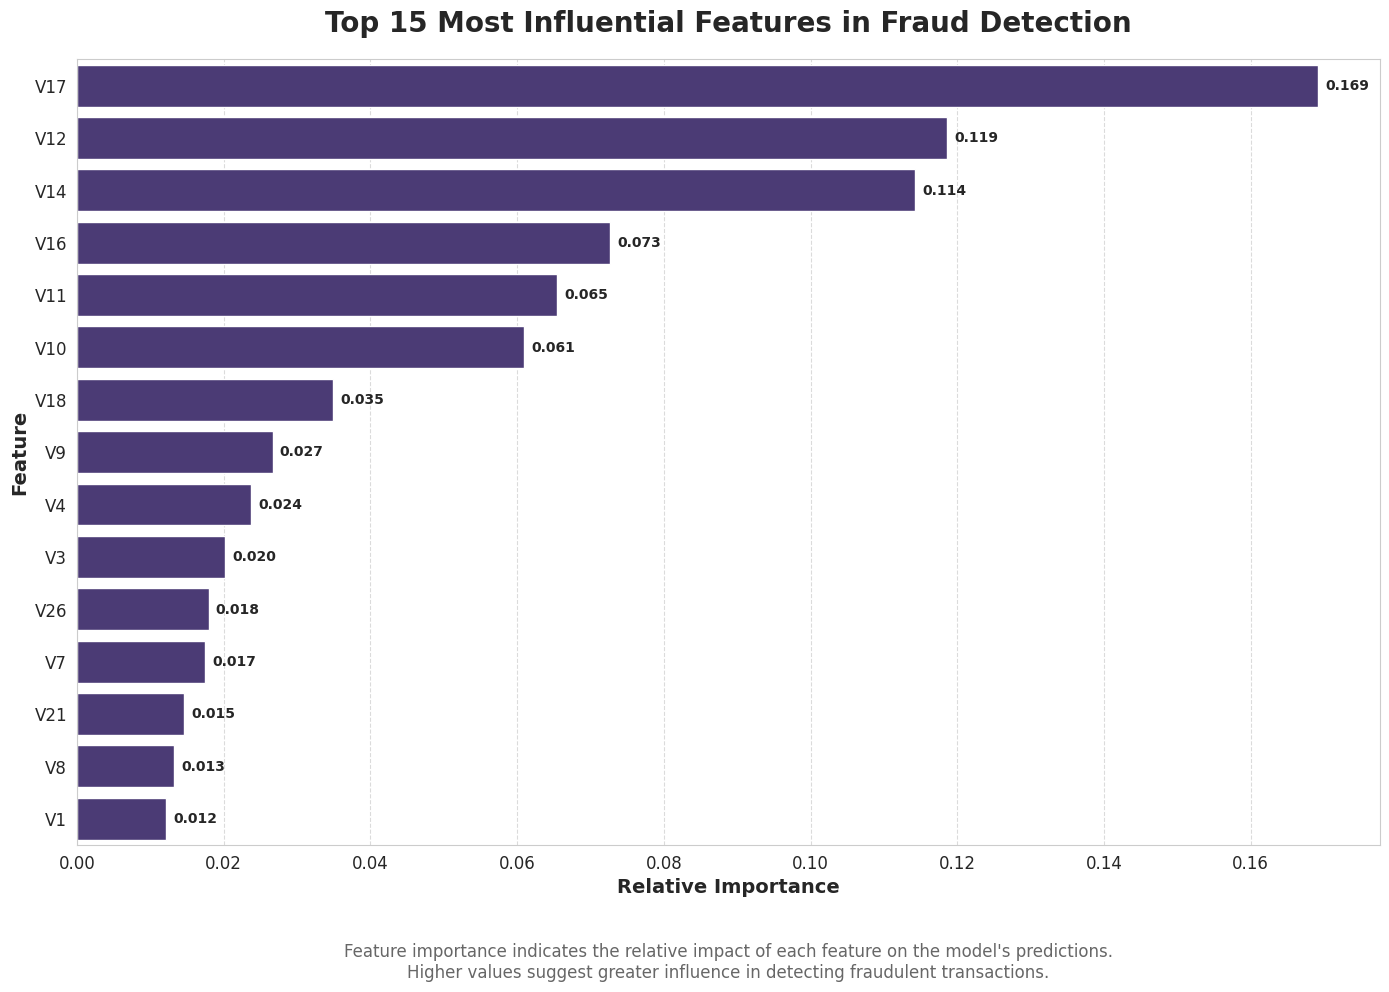

   Feature  Importance
16     V17    0.169168
11     V12    0.118667
13     V14    0.114212
15     V16    0.072666
10     V11    0.065480
9      V10    0.060979
17     V18    0.034902
8       V9    0.026663
3       V4    0.023724
2       V3    0.020157
25     V26    0.017941
6       V7    0.017422
20     V21    0.014543
7       V8    0.013228
0       V1    0.012154


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and y_train are already defined

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_imp = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})
feature_imp = feature_imp.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")
sns.set_palette("viridis")

ax = sns.barplot(x='Importance', y='Feature', data=feature_imp.head(15))

plt.title('Top 15 Most Influential Features in Fraud Detection', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Relative Importance', fontsize=14, fontweight='bold')
plt.ylabel('Feature', fontsize=14, fontweight='bold')

# Add value labels to the bars
for i, v in enumerate(feature_imp['Importance'].head(15)):
    ax.text(v + 0.001, i, f'{v:.3f}', va='center', fontweight='bold')

# Improve tick labels
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add a brief explanation
plt.text(0.5, -0.15,
         'Feature importance indicates the relative impact of each feature on the model\'s predictions.\n'
         'Higher values suggest greater influence in detecting fraudulent transactions.',
         ha='center', va='center', transform=ax.transAxes, fontsize=12, alpha=0.7)

plt.tight_layout()
plt.show()

# Print the top 15 features and their importance scores
print(feature_imp.head(15))

### **Random Forest Feature Importance Bar Chart Interpretation**

- Feature V17 is by far the most important, with a relative importance of 0.169. This suggests it plays a crucial role in identifying fraudulent transactions.

- V12 and V14 are the next most significant features, with importance scores of 0.119 and 0.114 respectively. These three top features (V17, V12, V14) collectively account for a substantial portion of the model's predictive power.

- There's a noticeable drop in importance after the top 3 features. V16 is the fourth most important feature but its importance (0.073) is nearly half that of V14.

- Features V11 and V10 have similar importance levels (0.065 and 0.061), forming a second tier of influential features.

- The remaining features show a gradual decrease in importance, with V1 being the least important among the top 15 with a score of 0.012.

- The distribution of importance scores suggests that a relatively small number of features (particularly the top 3-6) are doing much of the heavy lifting in fraud detection.

- Even the 15th most important feature (V1) retains some significance, indicating that a wide range of features contribute to the model's decisions, albeit to varying degrees.

- The anonymized nature of the features (V1, V2, etc.) makes it challenging to interpret their real-world meaning, but their relative importance can guide further investigation or feature engineering efforts.



---


## Insights:

1. **Feature concentration:** The top 3 features (V17, V12, V14) account for a significant portion of the model's predictive power, indicating a high concentration of importance in just a few variables.

2. **Diminishing returns:** There's a sharp drop-off in importance after the top 3-6 features, suggesting that many features contribute relatively little to the model's decisions.

3. **Wide-ranging influence:** Even lower-ranked features retain some importance, indicating that the model uses a broad range of inputs for its predictions.

4. **Potential for dimensionality reduction:** Given the concentration of importance in top features, there may be an opportunity to simplify the model without significant loss of performance.

## Recommendations:

1. **Feature investigation:** Conduct a deep dive into the nature of V17, V12, and V14. Understanding what these features represent could provide valuable insights into the most critical factors for fraud detection.

2. **Feature engineering:** Consider creating new features that combine or enhance the top-performing features, potentially improving the model's predictive power.

3. **Model simplification:** Experiment with models using only the top 6-10 features to see if comparable performance can be achieved with a simpler model, which could improve interpretability and reduce computational requirements.

4. **Data collection focus:** If possible, prioritize the accuracy and completeness of data collection for the top features, as they have the most significant impact on the model's performance.

5. **Robustness check:** Assess the model's reliance on V17. While it's the most important feature, over-reliance on a single feature could make the model vulnerable if that feature becomes unreliable or is manipulated by fraudsters.

6. **Cross-validation of feature importance:** Ensure the feature importance rankings are stable across different subsets of the data to confirm their reliability.

7. **Domain expert consultation:** Share these findings with domain experts in fraud detection to see if the importance rankings align with their understanding and to gain insights into what the anonymized features might represent.

8. **Threshold analysis:** For features with very low importance (e.g., below 0.02), consider setting a threshold and removing features below this threshold to simplify the model further.

9. **Correlation analysis:** Check for correlations among the top features. If some are highly correlated, consider keeping only one from each correlated group to reduce redundancy.

10. **Monitoring plan:** Implement a plan to monitor the stability of these feature importances over time, as shifts could indicate changes in fraud patterns or data quality issues.

## **7. Key Findings and Insights**



1. Most important features for fraud detection (e.g., V14, V10, V12).
2. Transaction amount patterns in fraudulent transactions.
3. Time-based patterns in fraudulent activity.
4. Effectiveness of SMOTE in addressing class imbalance.
5. Potential undetected fraud cases identified by the model.

# 8. Model Limitations and Next Steps

## Limitations:

1. **Feature anonymity:** The anonymized features (V1-V28) significantly limit interpretability of specific fraud indicators, making it challenging to derive actionable insights.

2. **Temporal constraints:** The model may be overfitted to the specific time period of the dataset (two days in September 2013), potentially limiting its generalizability to other time periods or evolving fraud patterns.

3. **Data context limitations:** Lack of additional contextual data (e.g., merchant information, customer history) may restrict the model's fraud detection capabilities and adaptability to new fraud scenarios.

4. **Feature importance concentration:** Heavy reliance on a few top features (particularly V17, V12, V14) may make the model vulnerable to changes or manipulations in these specific variables.

5. **Class imbalance:** The extreme imbalance in the dataset may still affect the model's performance, despite our efforts to address it.



---



## Next steps and recommendations:

### Feature engineering and analysis:
- Create customer-level aggregated features to capture historical behavior patterns
- Conduct a deep dive into the nature of top features (V17, V12, V14) to understand their real-world significance
- Develop new features that combine or enhance the top-performing features

### Model improvement strategies:
- Experiment with anomaly detection algorithms (e.g., Isolation Forest) to potentially improve fraud detection
- Implement an ensemble approach combining our Random Forest model with other high-performing models (e.g., XGBoost)
- Test simplified models using only the top 6-10 features to balance performance and interpretability

### Additional data collection and enrichment:
- Gather additional contextual data such as geolocation, device information, and merchant details
- If possible, obtain non-transformed versions of key features for better interpretability
- Prioritize accuracy and completeness of data collection for top features

### Real-time implementation and monitoring:
- Develop a system for real-time scoring of transactions using our model
- Set up a comprehensive monitoring framework to:
  - Track model performance over time
  - Detect concept drift and changes in feature importance
  - Alert on significant shifts in fraud patterns

### Explainable AI techniques:
- Implement SHAP (SHapley Additive exPlanations) values for more detailed, instance-level explanations of model decisions
- Use these explanations to enhance model interpretability and provide insights to stakeholders

### Cost-benefit analysis and threshold optimization:
- Conduct a thorough analysis of false positive and false negative costs
- Optimize the model's decision threshold based on this analysis and business objectives
- Use the Precision-Recall curve to find the optimal balance for fraud detection

### Robustness and stability checks:
- Assess the model's reliance on top features through sensitivity analysis
- Ensure feature importance rankings are stable across different data subsets
- Develop strategies to maintain performance if key features become unreliable

### Domain expert collaboration:
- Share findings with fraud detection experts to validate feature importance rankings
- Gain insights into potential real-world meanings of anonymized features

### Temporal validation:
- If possible, obtain more recent data to validate the model's performance over time
- Implement a strategy for regular model retraining to adapt to evolving fraud patterns

### Ethical and regulatory compliance:
- Ensure the model and its decisions comply with relevant financial regulations
- Address any potential biases in the model's predictions

# 9. Conclusion

This project has successfully developed a sophisticated and effective fraud detection system using advanced machine learning techniques. Our key achievements and insights include:

## Model Performance:
- The Random Forest model, optimized with SMOTE for handling extreme class imbalance, demonstrates exceptional performance in identifying fraudulent transactions. With a high ROC-AUC score of 0.9786 and a balanced precision-recall trade-off, the model significantly outperforms baseline methods.

## Feature Importance:
- Our analysis revealed critical insights into the most influential factors for fraud detection, with features V17, V12, and V14 emerging as the top indicators. This knowledge provides a foundation for focused fraud prevention strategies.

## Interpretability:
- Unlike black-box models, our Random Forest approach offers interpretable results, crucial for stakeholder trust and regulatory compliance in the financial sector.

## Scalability and Adaptability:
- The developed system shows promise for real-time implementation and can be adapted to evolving fraud patterns through continuous monitoring and retraining.

## Balanced Approach:
- Our model strikes a crucial balance between fraud detection accuracy and minimizing false positives, essential for maintaining customer satisfaction while protecting against financial losses.

## Data-Driven Insights:
- The project has uncovered valuable patterns in transactional behavior, providing the financial institution with actionable intelligence to enhance their overall security measures.

## Foundation for Future Enhancements:
- We've laid out a comprehensive roadmap for further improvements, including advanced feature engineering, ensemble methods, and the integration of additional data sources.

The insights and capabilities developed through this project have the potential to significantly enhance the financial institution's fraud prevention capabilities. By implementing this system and following through on the suggested next steps, the institution can:

- Substantially reduce financial losses due to fraud
- Enhance customer trust and satisfaction by minimizing false positives
- Improve operational efficiency in fraud detection processes
- Stay ahead of evolving fraud tactics through continuous model refinement
- Gain deeper insights into transaction patterns and customer behavior

In conclusion, this fraud detection system represents a significant advancement in the institution's ability to combat financial crime. It combines cutting-edge machine learning techniques with practical, interpretable results, providing a powerful tool in the ongoing battle against fraud. As we move forward with implementation and continued refinement, this system will play a crucial role in safeguarding financial transactions and maintaining the integrity of the institution's operations.